# Imports

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('data/winequalityN.csv')

# Initial Exploratory Look at the Data

In [27]:
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [28]:
df.shape

(6497, 13)

## Correlations

In [42]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


<AxesSubplot:>

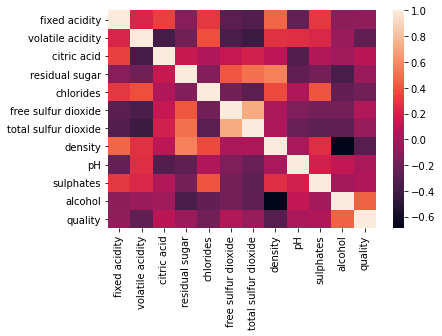

In [29]:
sns.heatmap(df.corr())

Wine Quality is negatively correlated to density, volatile acidity, chlorides, and positively correlated to alcohol (people like to get drunk!)

## Distributions of the Features

<Figure size 432x288 with 0 Axes>

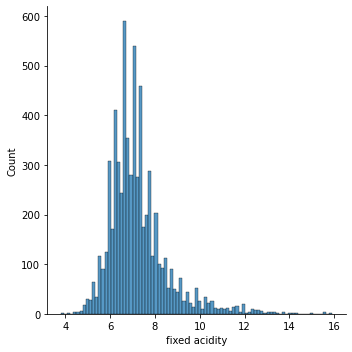

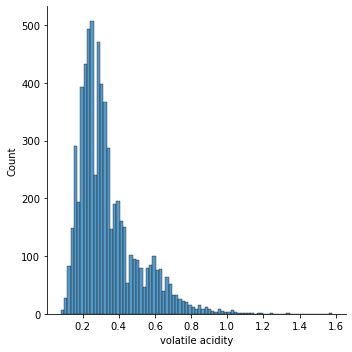

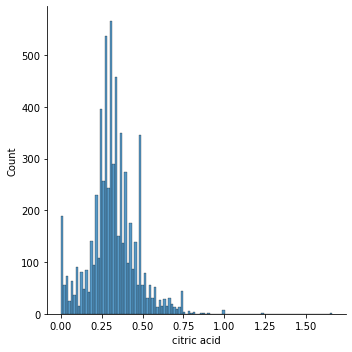

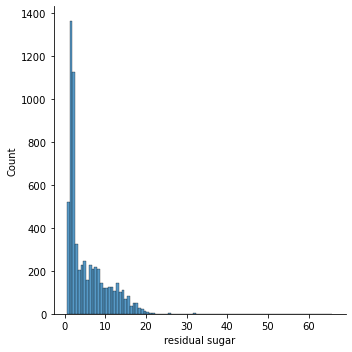

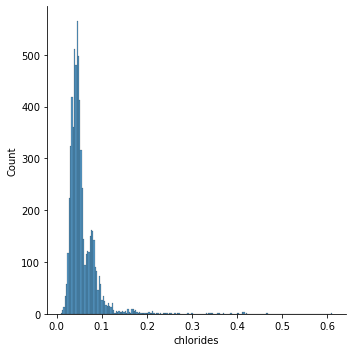

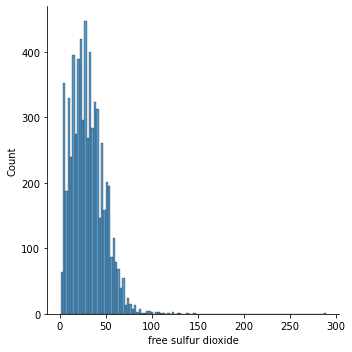

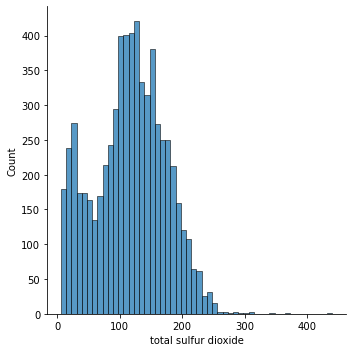

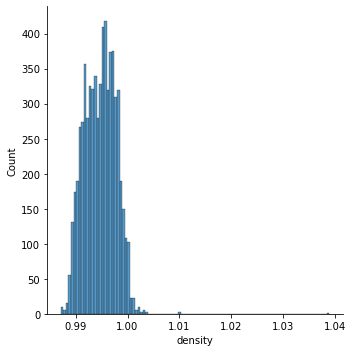

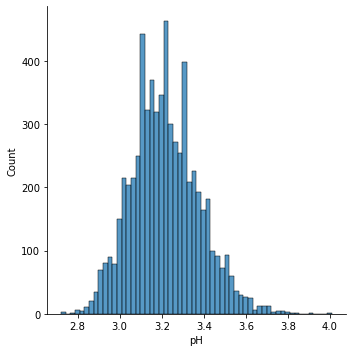

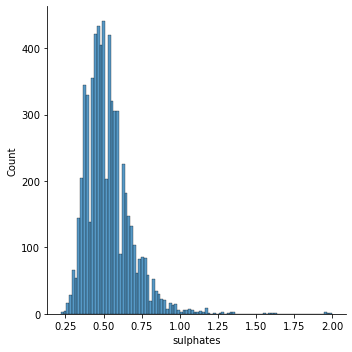

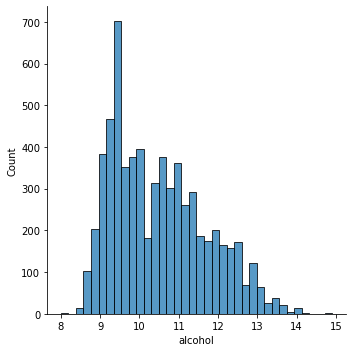

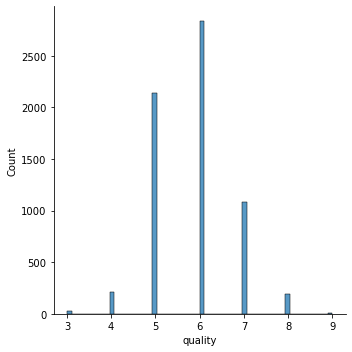

In [36]:
for i, col in enumerate(df.drop(['type'], axis=1).columns):
    plt.figure(i)
    sns.displot(df[col])

/usr/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

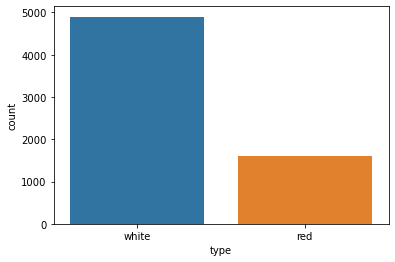

In [58]:
sns.countplot(df['type'])

### NaN Values

In [41]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

At less than 10 NaN values per feature, in a dataset of over 6,400 rows, it is not worth dealing with them at the moment. Especially considering that this is just storytelling and not a full on modeling notebook.

## Explore the Correlations Suggested by the Heatmap

Get descriptive statistics of the features, mean and 50% are the interesting metrics.

In [56]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Lets Use Mean

Mean for alcohol is 10.49, Density is .9947, Volatile Acidity is .3397, chlorides is 0.056

Lets recap Wine quality value counts as reference against the histogram plots

In [59]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### Alcohol

Text(0.5, 1.0, 'Quality perception when Alcohol is below the mean')

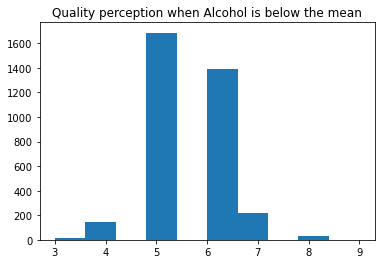

In [98]:
plt.hist(df[df['alcohol'] < 10.49]['quality'])
plt.title('Quality perception when Alcohol is below the mean')

Text(0.5, 1.0, 'Quality perception when Alcohol is above the mean')

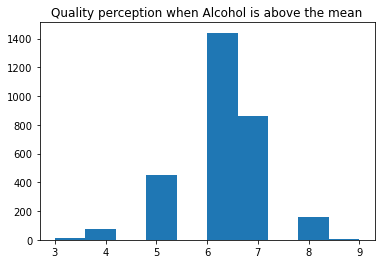

In [99]:
plt.hist(df[df['alcohol'] > 10.49]['quality'])
plt.title('Quality perception when Alcohol is above the mean')

Wine with higher alcohol density (alcohol content higher than the mean of 10.49) tends to receive better wine quality review than below. This suggests a correlation.

Lets do the same Histogram to Density and Volatile Acidity, based on the correlation heatmap, using the means of both.

### Density

Text(0.5, 1.0, 'Quality perception when Density is below the mean')

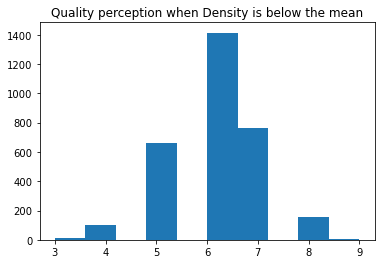

In [100]:
plt.hist(df[df['density'] < .9947]['quality'])
plt.title('Quality perception when Density is below the mean')

Text(0.5, 1.0, 'Quality perception when Density is Above the mean')

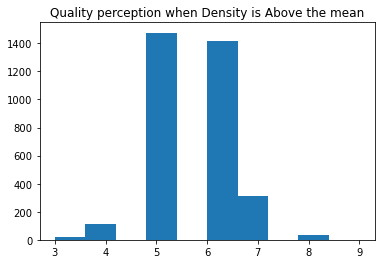

In [101]:
plt.hist(df[df['density'] > .9947]['quality'])
plt.title('Quality perception when Density is Above the mean')

### Volatile Acidity

Text(0.5, 1.0, 'Quality perception when Volatile Acidity is below the mean')

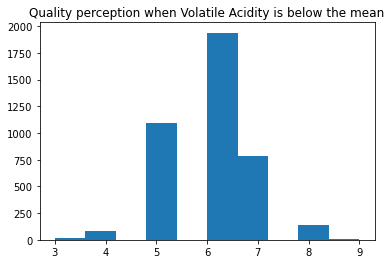

In [103]:
plt.hist(df[df['volatile acidity'] < .3397]['quality'])
plt.title('Quality perception when Volatile Acidity is below the mean')

Text(0.5, 1.0, 'Quality perception when Volatile Acidity is above the mean')

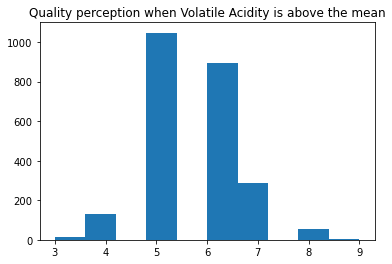

In [104]:
plt.hist(df[df['volatile acidity'] > .3397]['quality'])
plt.title('Quality perception when Volatile Acidity is above the mean')

### Chlorides

Text(0.5, 1.0, 'Quality perception when Chlorides is below the mean')

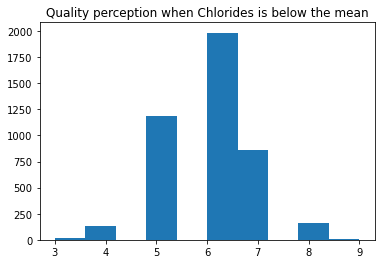

In [112]:
plt.hist(df[df['chlorides'] < .056]['quality'])
plt.title('Quality perception when Chlorides is below the mean')

Text(0.5, 1.0, 'Quality perception when Chlorides is above the mean')

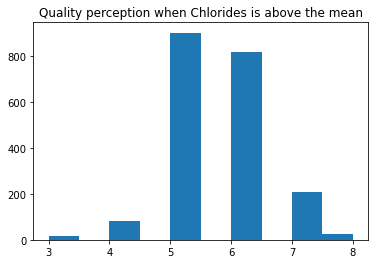

In [113]:
plt.hist(df[df['chlorides'] > .056]['quality'])
plt.title('Quality perception when Chlorides is above the mean')

Density Volatile Acidity and Chlorides are indeed negatively correlated to the perceived quality. The histograms for those three when below the mean look identical to the alcohol plot when above the mean. Vice versa is not necessarily true.

Correlations left out wine color due to it being a categorical variable. Plot histograms for those as well.

### Wine Color

Text(0.5, 1.0, 'White Wine Quality')

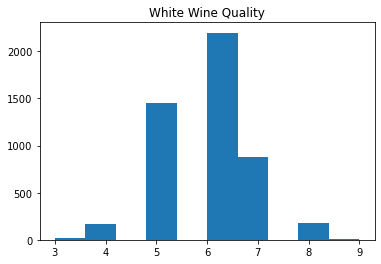

In [92]:
plt.hist(df[df['type'] == 'white']['quality'])
plt.title('White Wine Quality')

Text(0.5, 1.0, 'Red Wine Quality')

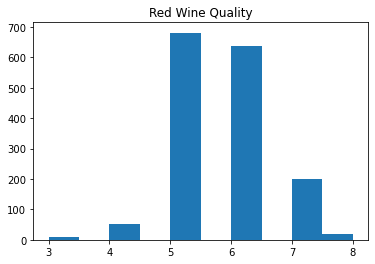

In [91]:
plt.hist(df[df['type'] == 'red']['quality'])
plt.title('Red Wine Quality')

Red wine is more strongly centered around 5-6 for quality reviews, whereas white wine is more evenly distributed closer resembling normal distribution.

This could also be because there is far more white wine data in the dataset than red, obeying the central limit theorem.

Text(0.5, 1.0, 'Wine Quality')

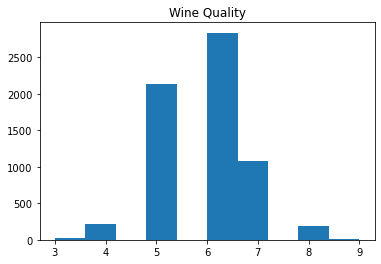

In [116]:
plt.hist(df['quality'])
plt.title('Wine Quality')

The white wine histogram, as well as the Alcohol > mean, as well as volatile acidity and density < mean all look like very similar plots.

This suggests correlations among all those variables, and will most likely be the biggest influences when run through training and testing models

Text(0.5, 1.0, 'Alcohol')

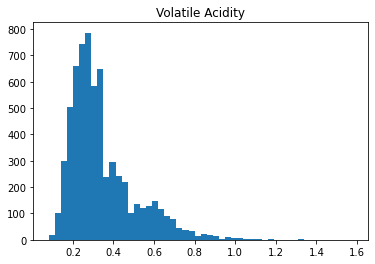

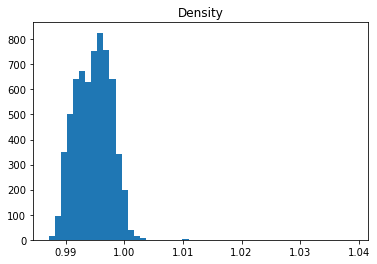

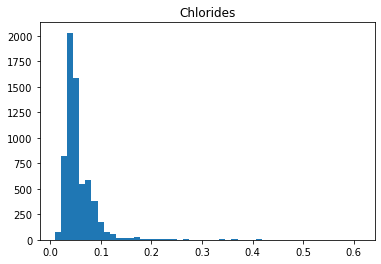

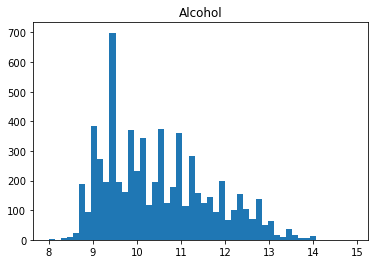

In [124]:
plt.figure()
plt.hist(df['volatile acidity'], bins=50)
plt.title('Volatile Acidity')
plt.figure()
plt.hist(df['density'], bins=50)
plt.title('Density')
plt.figure()
plt.hist(df['chlorides'], bins=50)
plt.title('Chlorides')
plt.figure()
plt.hist(df['alcohol'], bins=50)
plt.title('Alcohol')

Interestingly, the four variables mentioned are severely positively skewed, alcohol less so, but still noticable.

Then again, ALL the features have the positive skew at varying rates.